In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
import emcee
import pandas as pd
import corner
%matplotlib inline
from scipy import integrate

/Users/johnnosal/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = [(12.676817787115283, 4.840968499185621),
 (3.0635215093963133, 3.14922059397124),
 (8.9357879700357667, 5.431164887988198),
 (13.150389074317657, 0.2734372074578954),
 (12.925121692101902, 5.02106046462978),
 (10.269853674176913, 3.7776881451798454),
 (8.5618490817719284, 1.7531496843623315),
 (11.652310665546354, 0.13740741237008774),
 (15.785676964359141, 0.1589401373556326),
 (10.709910995988764, 1.405806821770987),
 (7.1341191045745171, 5.791539306670335),
 (21.883583042704814, 5.375575646320319),
 (9.3509495831601566, 1.5283167578387404),
 (8.9421204746670746, 1.2943521169392636),
 (7.9107785943448947, 2.41326855106268),
 (6.6761875778137583, 5.605375440538395),
 (11.650996974527924, 4.935997586415922),
 (17.290020321649969, 5.274010438371379),
 (13.06634684581484, 0.2347909715055829),
 (9.2602800850011402, 1.9716673533870746),
 (13.919837953941261, 5.528598466510076),
 (7.9171739378319606, 5.84750784658713),
 (12.864499776009934, 0.8278490177929644),
 (10.571617689971236, 2.36723797633488),
 (15.697626403745566, 6.217581078023053),
 (6.9542139194365262, 3.1860455750181425),
 (13.120156492593505, 4.864593354788696),
 (11.454973850882114, 1.8798442605946453),
 (10.614021877252608, 0.8044135861997307),
 (7.568300166951679, 2.673290291826998),
 (10.183500038106194, 1.309623551484031),
 (13.503996786942462, 0.04020573153381622),
 (14.908454853041013, 5.049774593191907),
 (16.502324161297746, 5.406433813862234),
 (7.7831240000772652, 5.45198929005635),
 (2.7144705188261025, 4.10012261788714),
 (6.3268913726889187, 5.6611505113173575),
 (9.343465517423013, 3.2971190116581632),
 (10.029091959312348, 0.5986208146884879),
 (12.078957723820951, 0.3853462849024228),
 (12.542705834818268, 1.5820979005652125),
 (9.8489274946698337, 2.6735253975153426),
 (11.349497927312719, 1.1055955472925354),
 (11.06556939865615, 2.5611692213120962),
 (11.242786106546351, 0.6500902431293415),
 (7.5720317139333542, 3.4428084142928075),
 (10.19301456907124, 2.427329872753534),
 (11.688185995125892, 0.14941531339444405),
 (13.321217017544326, 4.226862591173392),
 (9.2226853401109601, 2.3990630763955374),
 (7.0737562512314449, 0.8821159241146929),
 (5.5158907409668556, 2.287657630597947),
 (5.2424711689478309, 3.4418528431658317),
 (11.826235109408199, 3.3038133315910185),
 (6.2478202112864949, 3.7493402648869223),
 (7.2776616254733053, 2.666108760536187),
 (14.728663233221567, 5.923646379789856),
 (11.088563226667782, 2.974838497958867),
 (11.458847468046265, 1.2931851555147837),
 (4.0709653063610656, 2.4390760560779694),
 (15.530850378396899, 0.7685325485891545),
 (11.615168564683962, 2.7271570577326223),
 (10.632288760396049, 5.37570954124343),
 (6.9102179020649883, 1.9530381191410195),
 (7.1344237045084675, 1.6373486764522571),
 (2.4211573415830188, 2.810112760589519),
 (7.6108111175276107, 4.181915055702122),
 (9.6538205198090434, 4.444382820070389),
 (8.1905132263562983, 3.0534156042900285),
 (7.4546566492388493, 5.388475797989607),
 (14.087818085722649, 4.961727257154151),
 (7.2780971375915371, 2.54178907740794),
 (13.49355600611988, 2.493864649506947),
 (7.1166182479555999, 3.0195450895358524),
 (13.861336288014931, 6.246482002469356),
 (9.9498449141955589, 1.5817110088866608),
 (12.090250168282912, 3.990269038499848),
 (14.0111497595614, 0.9108297343631235),
 (9.3928518482934216, 3.3950553805254793),
 (8.2709147406350212, 3.214121983305056),
 (8.386404092046515, 2.1119573572471135),
 (6.9673744914092852, 2.2083135342567983),
 (9.5162641851488523, 3.2184133097802943),
 (17.967580316152478, 3.965622119805391),
 (15.832368008468372, 0.828357131652206),
 (5.3317615928107358, 2.6644501925548774),
 (5.8971983697046877, 3.0341229253117494),
 (17.963906775041007, 6.0469989006758444),
 (5.6300726881847361, 2.4077579346402826),
 (11.348534324413565, 3.8699231013565725),
 (10.028167958705753, 1.9397974132848168),
 (14.062219131934697, 4.41603067403343),
 (9.10707255345568, 0.8011371320017451),
 (10.567716164156263, 4.450436137829604),
 (10.928830310193101, 4.839816330906595),
 (11.681478622619728, 0.8572196990559613),
 (11.538949263967641, 5.760338188965996),
 (10.978084516398958, 4.49756314191279),
 (12.818751132975834, 4.411544813273495),
 (6.7181748281785731, 5.484421751460473)]



In [85]:


def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

def lnprob(x): #Returns the posterior for the Bayes Regresion - currently hard coded for the tide data given
    if x[3] < 0:
        return -np.infty
    else:
        return -0.5*x[3]*np.sum([(e[0] - x[0] - x[1]*np.sin(e[1])-x[2]*np.cos(e[1]))**2 for e in data]) + 0.5*len(data)*np.log(x[3]) - 0.5*(x[0]**2+ x[1]**2+ x[2]**2) - x[3]
    #mu = omega0 + omega1*np.sin(x) + omega2*np.cos(x))
    
    
class BayesReg:
    #Initialize the class - each instance requires a posteriori log function, data set, 
    #number of walkers and number of function parameters
    def __init__(self, post, data, nWalkers, nParameters):
        self.post = post
        self.data = data
        self.nWalkers = nWalkers
        self.nParameters = nParameters
        self.T = [x[1] for x in data]
        self.X = [x[0] for x in data]
        self.Tsum = sum([x[1] for x in self.data])
        self.Xsum = sum([x[0] for x in self.data])
        self.Ndata = len(self.data)

    def BayesTime(self):
        #Moves the walkers and determine parameters and lambda
        p0 = np.random.rand(self.nWalkers*self.nParameters).reshape((self.nWalkers,self.nParameters))
        sampler = emcee.EnsembleSampler(self.nWalkers, self.nParameters, self.post)
        pos, prob, state = sampler.run_mcmc(p0, 1000)
        sampler.reset() #Burns off the first 1000 steps - part of best practice
        pos, prob, state = sampler.run_mcmc(pos, 100000) #Variable number of steps for each walker
        samples = sampler.flatchain
        self.samples = samples
        N = len(samples)
        global omega0, omega1, omega2, omega3, lam #makes the variables global and usable outside the function
        omega0 = 1/float(N)*sum([e[0] for e in samples])
        omega1 = 1/float(N)*sum([e[1] for e in samples])
        omega2 = 1/float(N)*sum([e[2] for e in samples])
        lam = 1/float(N)*sum([e[3] for e in samples])
        print ('Omega0 = {0}, Omega1 = {1}, Omega2 = {2}, Lambda = {3}'.format(omega0, omega1, omega2, lam))
        #Print scatter plot and line of best fit
        Xval = np.arange(0,max(self.T), 0.01)
        Reg = [omega0 + omega1*np.sin(x) + omega2*np.cos(x) for x in Xval]
        fig, ax = plt.subplots(1,1, figsize = (5,3)) #plot scatter of data and expected value line
        ax.scatter(self.T,self.X)
        ax.plot(Xval, Reg, label ='Regression', color = 'red')
        ax.set_xlabel('t')
        ax.set_ylabel('$X_t$')
        ax.legend(loc = 'best', fontsize='small')
        ax.grid()
        
        data2 = pd.DataFrame(tide.samples) #plot of parameters - labeling columns caused a 'number of parameters' error message for reasons unknown
        data2.plot(kind = "density")
        
        #Corner plot below - still not 100% sure what this shows...
        fig = corner.corner(samples, labels=["$\omega_0$", "$\omega_1$", "$\omega_2$", "$\lambda$"])
   
    def predict(self, p, function): 
        #Attempt at a prediction method
        self.p = p #Time that you want to predict
        self.function = function
        #function for tide data is:
        #f = lambda x, t: lambda d: np.sqrt(d[3]/(2*np.pi))*np.exp(-0.5*(x - d[0] - d[1]*np.sin(t)-d[2]*np.cos(t))**2)
        predictiveDist = lambda t: np.vectorize(lambda x: MonteCarlo(lambda d: self.function(x,t)(d), samples))
        X = np.arange(0, 20, 1)
        plt.plot(X,predictiveDist(self.p)(X))


Omega0 = 9.46722475924, Omega1 = -0.631526325736, Omega2 = 1.76975653604, Lambda = 0.0956650168653


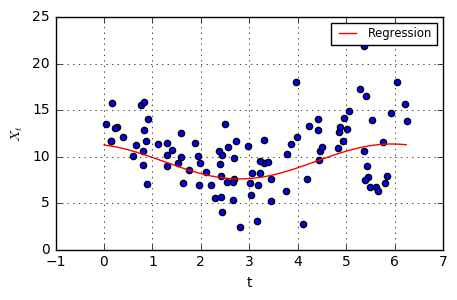

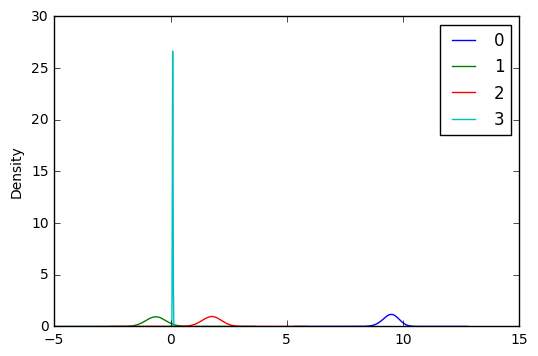

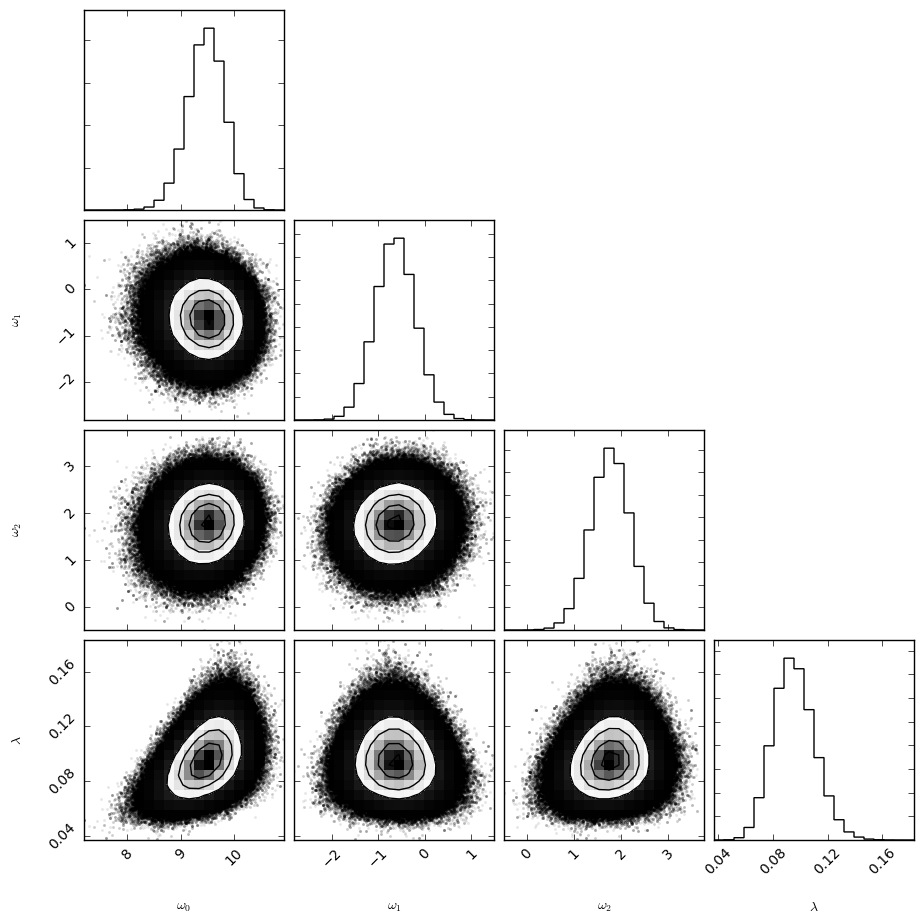

In [86]:
tide = BayesReg(lnprob, data, 40, 4) #New instance of Class BayesReg called 'tide' - lnprob function is the posterior, data is data, 40 walkers, and four function parameters
tide.BayesTime()


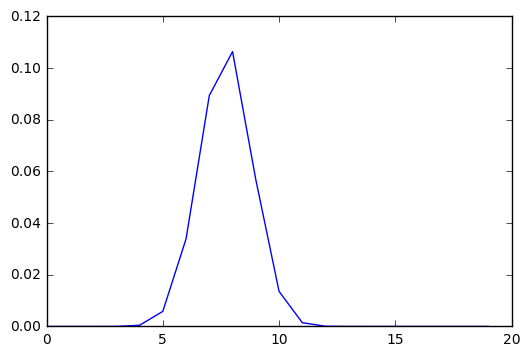

In [87]:
f = lambda x, t: lambda d: np.sqrt(d[3]/(2*np.pi))*np.exp(-0.5*(x - d[0] - d[1]*np.sin(t)-d[2]*np.cos(t))**2)
tide.predict(15,f)



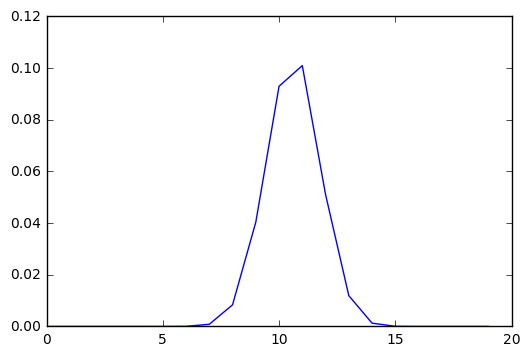

In [88]:
tide.predict(5,f)